Read 913 images from bag file.
done


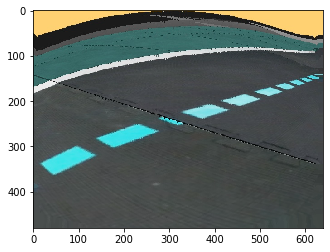

In [15]:
!pip3 install --quiet gnupg
import roslib
import rospy
import jupyros as jr
import rosbag
import cv2
from cv_bridge import CvBridge
from sensor_msgs.msg import Image, CompressedImage
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from collections import defaultdict
from matplotlib.animation import FFMpegWriter, FFMpegFileWriter
from IPython.display import Video




fig = plt.Figure()

def read_images_from_bag_file(topic="/baseline/corrected_image/compressed", bag_file_path="test.bag"):
    with rosbag.Bag(bag_file_path, 'r') as bag:        
        for i, (topic_name, msg, t) in enumerate(bag.read_messages()):
            if topic_name == topic:
                img_np = np.frombuffer(msg.data, np.uint8)
                cv_image = cv2.imdecode(img_np, 1)
                yield cv_image

def make_figures(image_gen):
    
    ax = fig.gca()
    img = None
    for i, image in enumerate(image_gen):
        if img is None:
            img = ax.imshow(image, interpolation='None', animated=True)
        else:
            img.set_data(image)
        ax.set_title(str(i))
        yield img

def make_video(image_gen, out_file="myfile.mp4"):
    writer = FFMpegWriter(fps=15)
    with writer.saving(fig, out_file, dpi=100):
        for obj in make_figures(image_gen):
            writer.grab_frame()
    return fig, Video(out_file)    

image_gen = read_images_from_bag_file()
images = list(image_gen)
print("Read", len(images), "images from bag file.")

figure_gen = make_figures(image_gen)

im = None
def f(i):
    global im
#     print(f"f({i})")
    if i == 0:
        im = plt.imshow(images[i])
    else:
        im.set_data(images[i])
    return im,

im = np.random.randn(100,100)
image = plt.imshow(im, interpolation='None', animated=True)

animation = matplotlib.animation.FuncAnimation(fig, func=f, frames=10, interval=67, blit=True)
video = animation.to_html5_video()
print("done")

In [11]:
from IPython.core.display import HTML
HTML(video)